## Importing the required libraries

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


## Loading the dataset

In [41]:
df = pd.read_csv("../CCPP.csv")
print("Shape:", df.shape)
df.head()

Shape: (9568, 6)


,AT,VC,AP,RH,PE,PR
0,8.34,40.77,1010.84,90.01,480.48,1
1,23.64,58.49,1011.40,74.20,445.75,2
2,29.74,56.90,1007.15,41.91,438.76,3
3,19.07,49.69,1007.22,76.79,453.09,4
4,11.80,40.66,1017.13,97.20,464.43,5


## Data Overview

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   VC      9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
 5   PR      9568 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 448.6 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
VC,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76
PR,9568.0,4784.500000,2762.188022,1.00,2392.7500,4784.500,7176.25,9568.00


In [44]:
duplicates = df.duplicated().sum()
int(duplicates)

0

## Missing Value Check

In [45]:
df.isnull().sum()

AT    0
VC    0
AP    0
RH    0
PE    0
PR    0
dtype: int64

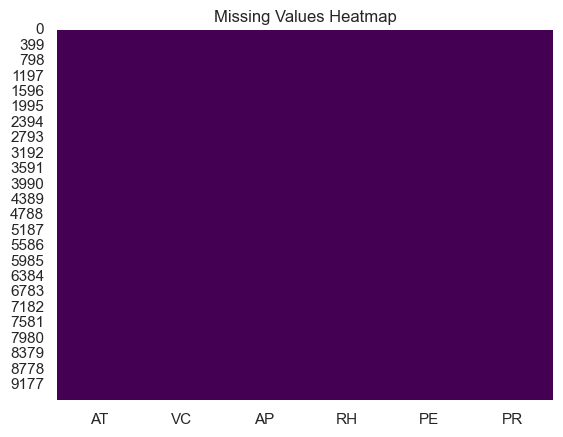

In [46]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show
plt.savefig("../visualization/missing_value.png")


## Feature-wise Distribution and Outliers

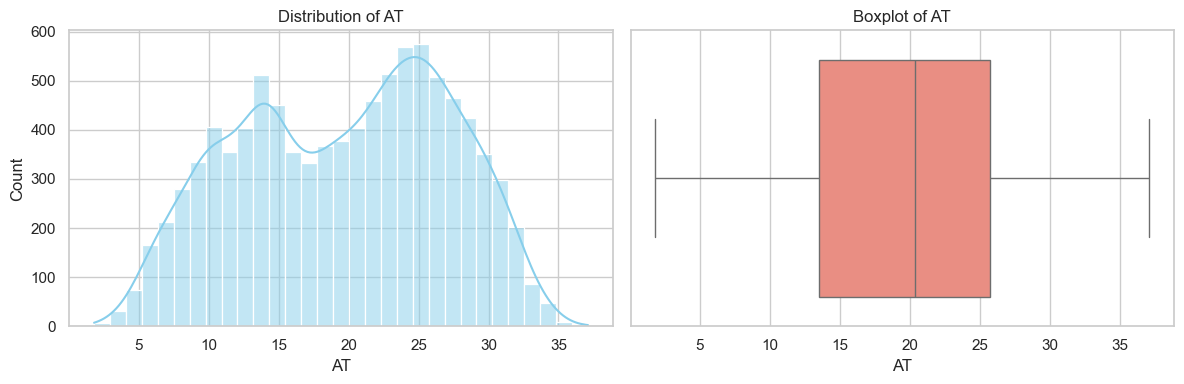

<Figure size 640x480 with 0 Axes>

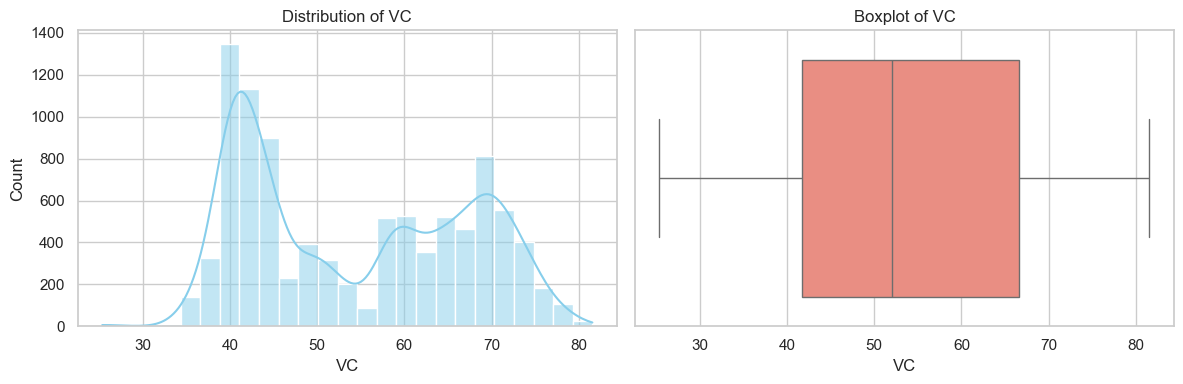

<Figure size 640x480 with 0 Axes>

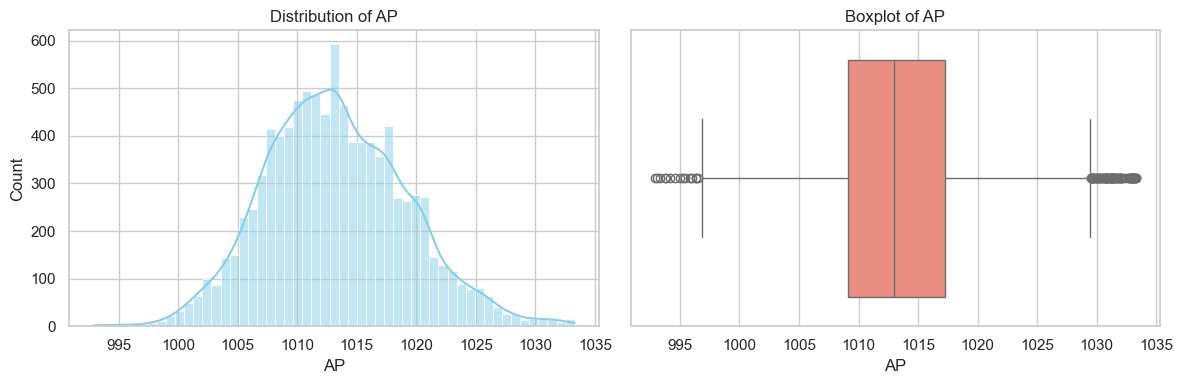

<Figure size 640x480 with 0 Axes>

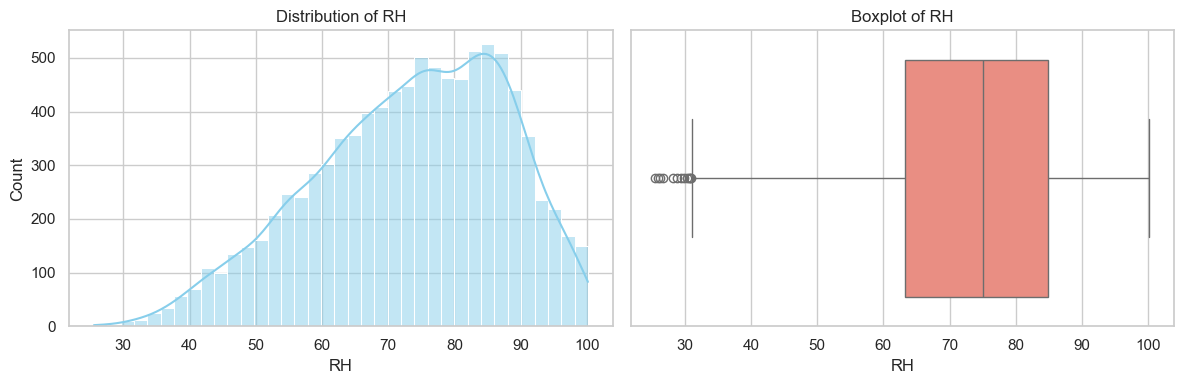

<Figure size 640x480 with 0 Axes>

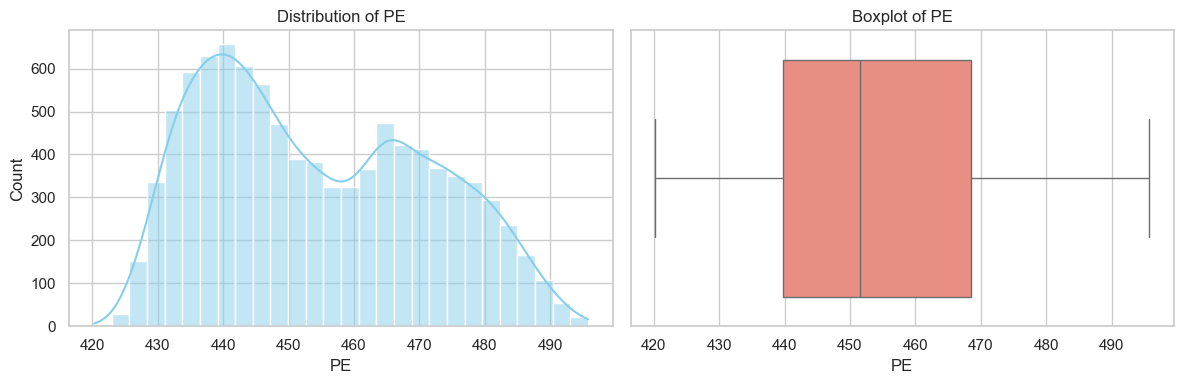

<Figure size 640x480 with 0 Axes>

In [47]:
features = ['AT', 'VC', 'AP', 'RH', 'PE']

for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Distribution of {col}")

    sns.boxplot(x=df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()
    plt.savefig("../visualization/distribution_and_outliers.png")


## Correlation Heatmap

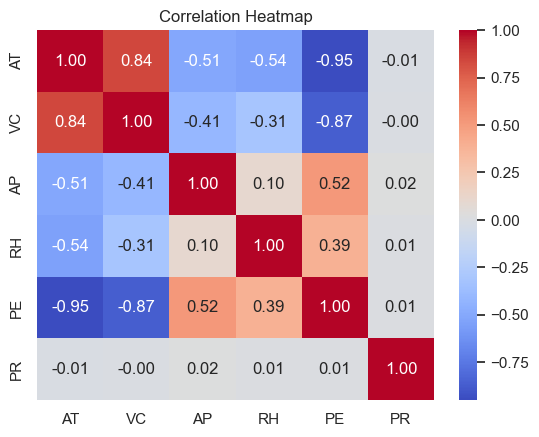

<Figure size 640x480 with 0 Axes>

In [48]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
plt.savefig("../visualization/corr_heatmap.png")

## Pairplot

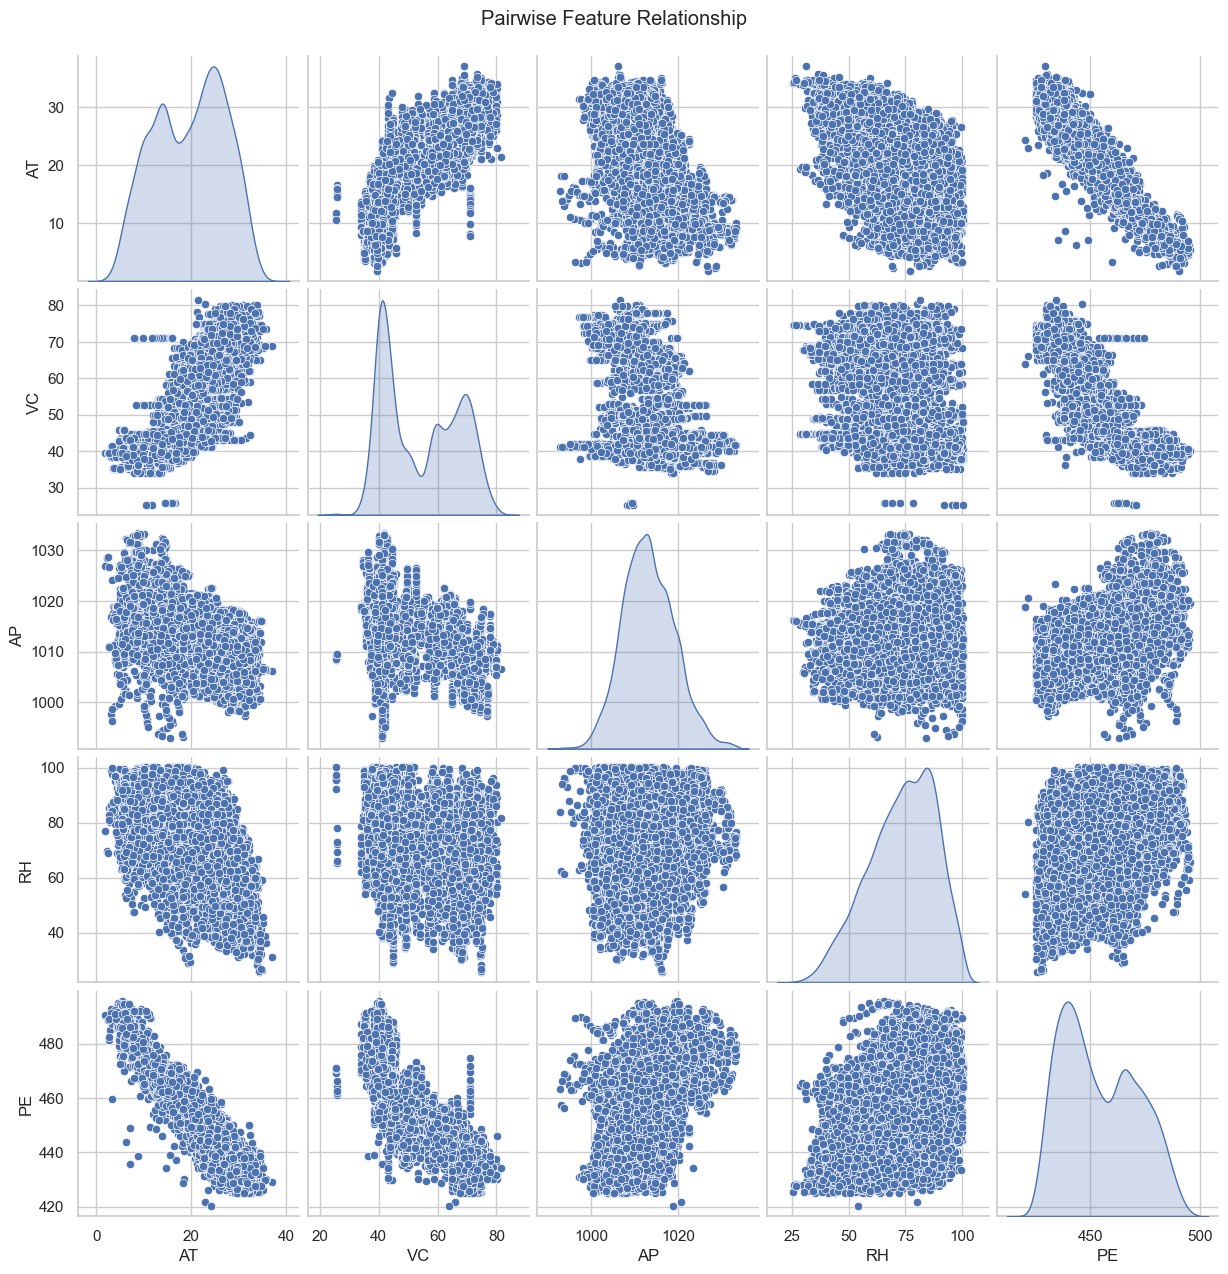

<Figure size 640x480 with 0 Axes>

In [49]:
sns.pairplot(df[features], diag_kind='kde')
plt.suptitle("Pairwise Feature Relationship", y=1.02)
plt.show()
plt.savefig("../visualization/pairplot.png")

## Target Variable (PE) Analysis

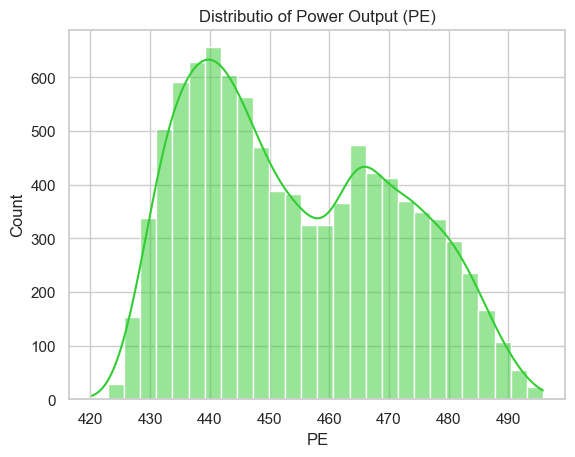

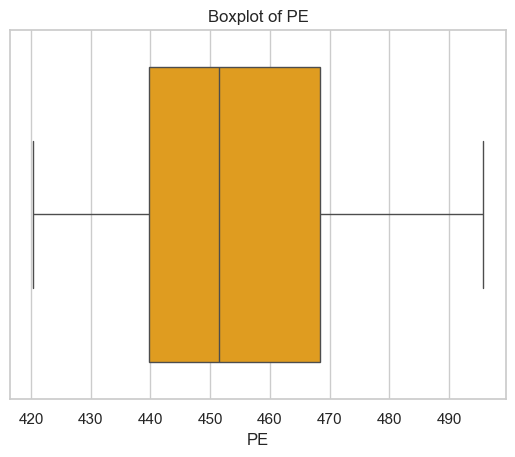

PE    1.000000
AP    0.518429
RH    0.389794
VC   -0.869780
AT   -0.948128
Name: PE, dtype: float64

<Figure size 640x480 with 0 Axes>

In [50]:
sns.histplot(df['PE'], kde=True, color='limegreen')
plt.title("Distributio of Power Output (PE)")
plt.show()
plt.savefig("../visualization/dist_of_PE.png")

sns.boxplot(x=df['PE'], color='orange')
plt.title("Boxplot of PE")
plt.show()
plt.savefig("../visualization/boxplot_of_PE.png")

df[features].corr()['PE'].sort_values(ascending=False)

## Features vs Target Scatterplot

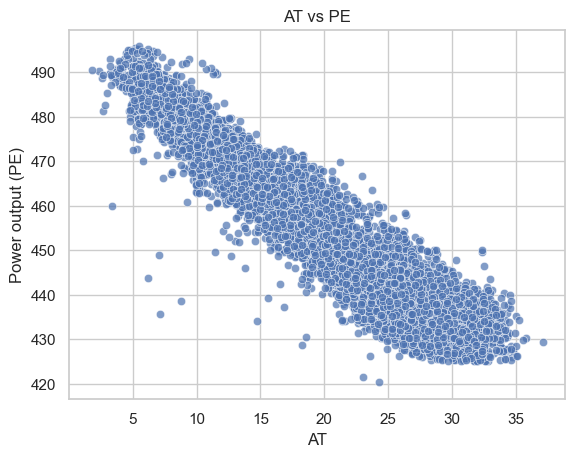

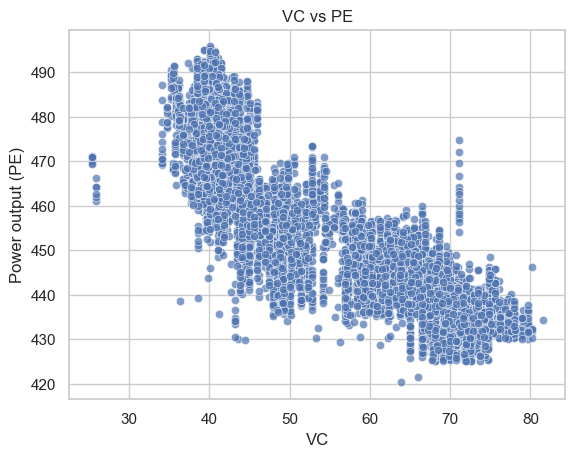

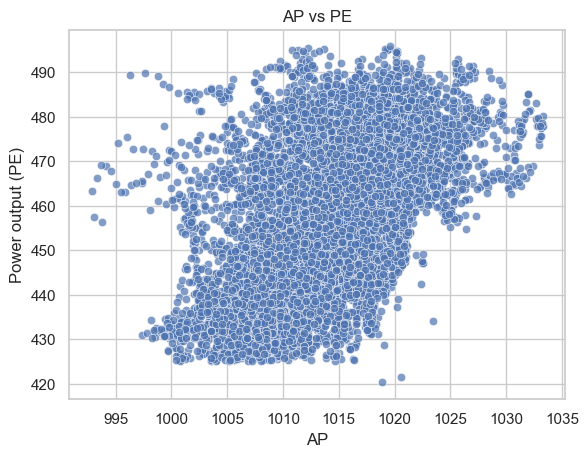

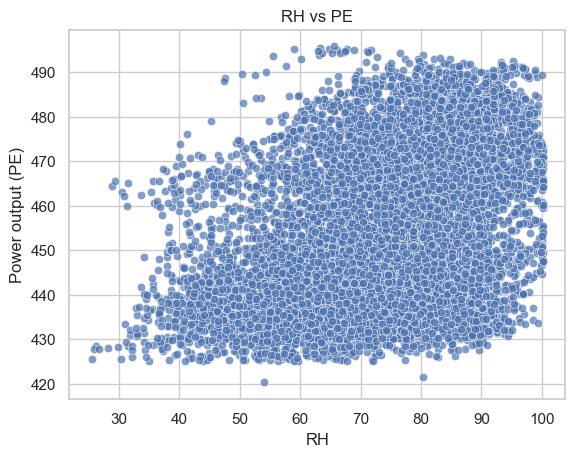

<Figure size 640x480 with 0 Axes>

In [51]:
for col in features[:-1]:
    sns.scatterplot(x=df[col], y=df['PE'], alpha=0.7)
    plt.title(f"{col} vs PE")
    plt.xlabel(col)
    plt.ylabel("Power output (PE)")
    plt.show()
    plt.savefig("../visualization/features_vs_target_scatterplot.png")

## Outlier Detection via IQR

In [52]:
def detect_outliers_iqr(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} : {len(outliers)} outliers")

for col in features:
    detect_outliers_iqr(col)

AT : 0 outliers
VC : 0 outliers
AP : 88 outliers
RH : 12 outliers
PE : 0 outliers


## Multicollinearity

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[features[::-1]]
y = add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data) 



  feature           VIF
0      PE   8110.562767
1      RH     42.893539
2      AP  10249.440379
3      VC     84.040542
4      AT     87.952519


## Summary of insights

In [54]:
summary = {
    "Missing Values": df.isnull().sum().to_dict(),
    "Duplicates": df.duplicated().sum(),
    "Highly correlated with PE": df[features].corr()['PE'].abs().sort_values(ascending=False)[1:3].index.tolist(),
    "Outliers": {col: len(df[(df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) |
                             (df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))])
                 for col in features}
}
summary

{'Missing Values': {'AT': 0, 'VC': 0, 'AP': 0, 'RH': 0, 'PE': 0, 'PR': 0},
 'Duplicates': np.int64(0),
 'Highly correlated with PE': ['AT', 'VC'],
 'Outliers': {'AT': 0, 'VC': 0, 'AP': 88, 'RH': 12, 'PE': 0}}